In [ ]:
from torch.autograd import Variable
import torch

In [ ]:
x=Variable(torch.rand(500,500,1),requires_grad=True)

In [ ]:
x

In [ ]:
expression=x**3-x

In [ ]:
optimizer=torch.optim.SGD([x],lr=0.01)
num_steps=1000
penalty=0.1

In [ ]:
for step in range(num_steps):
    expression=torch.norm(x**3-x)
    expression.backward(retain_graph=True)
    grad_norm=torch.norm(x.grad)
    penalty_term=penalty*grad_norm
    expression_with_penalty=penalty_term+expression
    optimizer.zero_grad()
    expression_with_penalty.backward()
    optimizer.step()
    x.grad.data.zero_()


In [ ]:
print(x)

In [1]:
from skimage import color,io
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
img=io.imread("../images/d_r_125_.jpg")

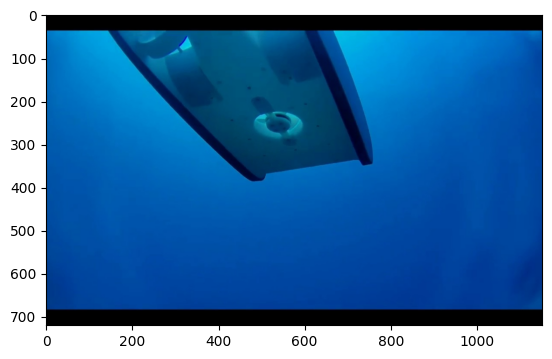

In [3]:
plt.imshow(img)

In [4]:
def make_correction(channel:np.ndarray,mu:float)->np.ndarray:
    channel=channel/255.0
    channel_mean=channel.mean()
    channel_var=channel.var()
    channel_max=channel_mean+mu*channel_var
    channel_min=channel_mean-mu*channel_var
    channel_corrected=255.0*(channel-channel_min)/(channel_max-channel_min)
    channel_corrected=np.clip(channel_corrected,0,255)
    return channel_corrected.astype(np.uint8)

In [5]:
def shrink(x:any,eps:float)->float:
    ans=x*np.max(np.abs(x)-eps,0)/np.abs(x)
    return ans

In [6]:
def get_corrected_image(img:np.ndarray,mu:float)->np.ndarray:
    R,G,B=img[:,:,0],img[:,:,1],img[:,:,2]
    R_corrected,G_corrected,B_corrected=make_correction(R,mu),make_correction(G,mu),make_correction(B,mu)
    corrected_image=np.stack([R_corrected,G_corrected,B_corrected],axis=-1)
    return corrected_image


In [7]:
def RGB2LAB(img:np.ndarray)->tuple[np.ndarray]:
    lab_img=color.rgb2lab(img)
    L,A,B=lab_img[:,:,0],lab_img[:,:,1],lab_img[:,:,2]
    return (L,A,B)

In [8]:
def initialize_RI(L_channel:np.ndarray,sigma:float=2)->tuple[np.ndarray]:
    height,width=L_channel.shape[0],L_channel.shape[1]
    R=np.zeros(shape=(height,width))
    I0=cv.GaussianBlur(L_channel,(0,0),sigmaX=sigma,sigmaY=sigma)
    return (R,I0)

In [1]:
import torch 
from torch.optim import Optimizer

In [2]:
from typing import Any, Dict
from torch.optim.optimizer import params_t

class Retinex_optimizer(Optimizer):
    def __init__(self, params: params_t, defaults: Dict[str, Any]) -> None:
        self.values=params
        super().__init__(params,defaults)
    
    def step(self):
        L,I=self.values[0],self.values[1]
        
        return 0

In [3]:
x=torch.tensor(torch.ones(size=(5,5)),requires_grad=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_5400\1297075878.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x=torch.tensor(torch.ones(size=(5,5)),requires_grad=True)


In [6]:
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)

In [7]:
gradient=torch.autograd.grad(x.sum(),x)[0]

In [8]:
gradient

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])